# Lab 1: Linux commands & Python

(Last update: 16/10/2023)

Name: **Huỳnh Trí Nhân**  
Sdudent ID: **21120302**

---

**Abstract**: This assignment tests your Python and Linux command skills. It also provides a general process for you to start a data project: Collect data $\to$ Preprocess data $\to$ Explore the meaning of data $\to$ Mine insights from data.


## 0. Instructions for doing and submitting assignment

**How to do your assignment**

You will do your assignment directly on this notebook file. First, you fill your name and student code at the beginning of the file. In this file, you will write your code when you see the following lines of code:
```python
# YOUR CODE HERE
raise NotImplementedError()
```

For optional coding parts, there will be:
```python
# YOUR CODE HERE (OPTION)
```

For markdown cell, there will be:
```markdown
YOUR ANSWER HERE
```

Of course, you have to remove the `raise NotImplementedError()` statement when you finish.

For coding parts, there are often cells below to help you check your answers. You will pass the test if there are no errors when you run the test cells. In some cases, the tests are insufficient. That means if you do not pass the test, your answer is definitely wrong somewhere, but if you pass the test, your answer may still be incorrect.

While doing the assignment, you should print out the output and create more cells for testing. But you have to remove all of them (comment your print-out codes, delete the cell created by you) when you submit your code. <font color=red>Do not remove or edit my cells</font> (except for the aforementioned cells).

Keep your code clean and clear by using meaningful variable names and comments, not write too-long coding lines.
Press `Ctrl + S` right after editing.

Keep it real: The reason why you are here is to <font color=green>study, really study</font>. I highly recommend that you discuss your idea with your friends and <font color=green>write your own code based on your own knowledge</font>. <font color=red>Copy means zero.</font>

**How to submit your assignment**

When grading your assignment, I will choose `Kernel` - `Restart & Run All` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

After that, rename the notebook as `<Student ID>.ipynb`. For example, if your student code is 1234567, then your notebook is `1234567.ipynb`.

Finally, submit your notebook file on Moodle. <font color=red>Please strictly follow the submission rules.</font>

---

## 1. Programming environment

- You will re-use the Linux environment setup in Lab 0 - WarmUp. Don't forget to start your coding environment (`conda activate min_ds-env`) before doing your assignment.
- Use Jupyter notebook or Jupyter lab, <font color=red>not Google Colab</font> (I can not grade you well on Google Colab) to edit your `*.ipynb` file.

In [27]:
import sys
sys.executable

'd:\\Program\\anaconda3\\envs\\min_ds-env\\python.exe'

- Import necessary libraries

In [28]:
import datetime
# YOUR CODE HERE (OPTION)

## 2. Data collection

- You are required to do the following tasks using Linux command:
    - Create a folder named `./data`
    - Collect data from the the links that were specified in `links.txt` and save to `./data` using `wget`
    - After collecting data, rename your data as `data_2019.csv`, `data_2018.csv` and `guidance.csv` using `mv`
    - List all the file contained in `./data` using `ls`

In [29]:
%%bash
# Tải dữ liệu từ các trang web
# wget: lệnh tải dữ liệu từ web
# -i: file chứa các đường link
# -P: thư mục lưu trữ
wget -i links.txt -P ./data

# create folder data and download data to that folder


--2023-10-31 21:46:19--  https://datamillnorth.org/download/road-traffic-accidents/8e6585f6-e627-4258-b16f-ca3858c0cc67/Traffic%2520accidents_2019_Leeds.csv
Resolving datamillnorth.org (datamillnorth.org)... 216.24.57.253, 216.24.57.3
Connecting to datamillnorth.org (datamillnorth.org)|216.24.57.253|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /download/2o11d/8e6585f6-e627-4258-b16f-ca3858c0cc67 [following]
--2023-10-31 21:46:20--  https://datamillnorth.org/download/2o11d/8e6585f6-e627-4258-b16f-ca3858c0cc67
Reusing existing connection to datamillnorth.org:443.
HTTP request sent, awaiting response... 302 Found
Location: https://datapress-files.ams3.digitaloceanspaces.com/leeds/dataset/2o11d/2020-07-16T10%3A17%3A59/Traffic%20accidents_2019_Leeds.csv?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Content-Sha256=UNSIGNED-PAYLOAD&X-Amz-Credential=PGFSIURNB2RGEURH2EBZ%2F20231031%2Fams3%2Fs3%2Faws4_request&X-Amz-Date=20231031T144621Z&X-Amz-Expires=21600&X-Amz-Signat

In [30]:
%%bash
# Truy cập vào thư mục data
cd data
# Đổi tên file
mv "RTC 2018_Leeds.csv" "data_2018.csv"
mv "Traffic accidents_2019_Leeds.csv" "data_2019.csv"
mv "accidentsguidance.csv" "guidance.csv"

# change the names


## 3. Data exploring & Data preprocessing

### 3.0. Read data

- First, I suggest you check the downloaded data by yourself before handing on the code. What kind of the data that you have just downloaded? What is the meaning of each file?

YOUR ANSWER HERE

- After checking the data, design a function named `read_data` with the name of data file as parameter, which returns a dictionary. Each element of this dictionary follows:
    - Key: Name of the columns
    - Value: Lists which contains the data of the coresponding columns

In [31]:
def read_data(file_name):
    file = open(file_name, 'r')
    result_cols ={}
    # Tách dòng đầu để lấy tên các cột
    first_line = file.readline().strip().split(',')

    #Với mỗi tên cột tạo một danh sách rỗng
    for first_line_val in first_line:
        result_cols[first_line_val] = []
        
    # Đọc từng dòng, nêu có trường hợp ngoại lệ thì bỏ qua
    for line in file:
        
        line_vals = line.strip().split(',')
        # if '' in line_vals:
        #     continue
        for i in range(len(first_line)):
            result_cols[first_line[i]].append(line_vals[i])  
    file.close()
    return result_cols


data_2018 = read_data('./data/data_2018.csv')
data_2019 = read_data('./data/data_2019.csv')

In [32]:
# TEST
assert set(data_2018.keys()) == set(['Accident Fields_Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Fields_Reference Number', 'Vehicle Number', 'Type of Vehicle', 'Casualty Fields_Reference Number', 'Casualty Veh No', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'])
assert set(data_2019.keys()) == set(['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', 'Accident Date', 'Time (24hr)', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Vehicle Number', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty'])

id_col_len = len(data_2018['Accident Fields_Reference Number'])
for col_name in data_2018:
    assert len(data_2018[col_name]) == id_col_len
    
id_col_len = len(data_2019['Reference Number'])
for col_name in data_2019:
    assert len(data_2019[col_name]) == id_col_len

### 3.1. The meaning of each column/row

- Please refer to `./data/guidance.csv` in order to get the meaning of each column
- Each row corresponds to an accident with a unique reference number
- Compute the number of rows and columns and assign to `num_rows_2018`, `num_cols_2018`, `num_rows_2019`, `num_cols_2019`

In [33]:
num_rows_2018 = len(data_2018['Accident Fields_Reference Number'])
num_cols_2018 = len(data_2018.keys())
num_rows_2019 = len(data_2019['Reference Number'])
num_cols_2019 = len(data_2019.keys())
print(f'Number of rows in 2018 dataset: {num_rows_2018} and number of columns: {num_cols_2018}')
print(f'Number of rows in 2019 dataset: {num_rows_2019} and number of columns: {num_cols_2019}')

# number of columns and rows of each dataset

Number of rows in 2018 dataset: 1995 and number of columns: 21
Number of rows in 2019 dataset: 1907 and number of columns: 18


In [34]:
# TEST
assert (num_rows_2018, num_cols_2018, num_rows_2019, num_cols_2019) == (1995, 21, 1907, 18)

### 3.2. Duplicated columns

- Observe the data in 2018, you can see that columns `Accident Fields_Reference Number`, `Vehicle Fields_Reference Number` and `Casualty Fields_Reference Number` seem to contain quite similar data.

- Additionally, columns `Number of Vehicles` and `Vehicle Number` in `data_2018` and `data_2019` also look quite similar.

- In order to make sure of these hypothesises, you have to check these columns. Your mission is to design a function named `check_similarity` in order to check the similarity (in percentage) of 2 given columns.
- The percentage of similarity is computed by dividing the number of similar samples to total samples. `check_similarity` return a number illustrating the similarity of 2 columns.


In [35]:
def check_similarity(data, col_name_1, col_name_2):
    similar_count = 0
    for i in range(len(data[col_name_1])):
        if data[col_name_1][i] == data[col_name_2][i]:
            similar_count += 1
    return (similar_count/len(data[col_name_1]))
    

In [36]:
# TEST
assert round(check_similarity(data_2018, 'Accident Fields_Reference Number', 'Vehicle Fields_Reference Number'),5) == 1.
assert round(check_similarity(data_2018, 'Accident Fields_Reference Number', 'Casualty Fields_Reference Number'),5) == 1.
assert round(check_similarity(data_2018, 'Number of Vehicles', 'Vehicle Number'), 5) == 0.65213
assert round(check_similarity(data_2019, 'Number of Vehicles', 'Vehicle Number'), 5) == 0.67541

- Therefore, column `Accident Fields_Reference Number`, `Vehicle Fields_Reference Number` and `Casualty Fields_Reference Number` contain the same data. We have to remove 2 of them.
- It could be noise for us to analyze 2 columns with more than 65% similarity, so I also decide to remove `Vehicle Number`.
- Since removing an element from a dictionary is a really hard task for beginner, I will help you on that.

In [37]:
del data_2018['Vehicle Fields_Reference Number'], data_2018['Casualty Fields_Reference Number']
del data_2019['Vehicle Number'], data_2018['Vehicle Number']

### 3.3. Data merging & Data checking

- In order for us to conveniently analyze the data, we should merge 2 data sets into 1.
- Compare the columns of 2 data sets, you can see that there are some unmergeable columns:
    - Column `Casualty Veh No` in `data_2018`: `data_2019` does not have one, so we have to remove this column from `data_2018`
    - Column `Accident Fields_Reference Number` in `data_2018` should be changed to `Reference Number`
- I will help you on these 2 tasks, then you will merge 2 data sets into `data_18_19`

In [38]:
# delete `Casualty Veh No` in data_2018
del data_2018['Casualty Veh No']

# rename
data_2018['Reference Number'] = data_2018.pop('Accident Fields_Reference Number')

In [39]:
# TEST
assert set(data_2018.keys()) == set(data_2019.keys())

In [40]:
# print(set(data_2018.keys()))
# print(set(data_2019.keys()))

# merge data_2018 and data_2019
data_18_19 = data_2018
for key in data_18_19.keys():
    data_18_19[key] += data_2019[key]

- After merging 2 data sets, you have to check whether there is any duplicated row based on the ID of each case. If there is, it should be removed from the dataset.

In [41]:
id_col = data_18_19['Reference Number']
num_duplicated = len(id_col) - len(set(id_col))

print(f'Duplicated rows: {"True" if num_duplicated > 0 else "False"}. Number of duplicated rows: {num_duplicated}')

Duplicated rows: True. Number of duplicated rows: 904


In [42]:
# Sao chep cột reference number ra vùng nhớ tạm
reference_col = data_18_19['Reference Number'][:]

# Tìm tập giá trị không trùng bằng set()
unique_values = set(reference_col)
# Bởi vì khi xóa thì hàng phần tử dưới dịch lên trên 1 đơn vị nên cần đánh dấu số hàng trùng bị xóa
removed = 0

for i in range(len(reference_col)): 
    
    if (len(unique_values)!= 0) and (reference_col[i] in unique_values):
        unique_values.remove(reference_col[i])
        continue

    for key in data_18_19.keys():
        # if i-removed >= len(data_18_19[key]):
        #     continue
        del data_18_19[key][i-removed]
        
    removed += 1

# remove duplicated row from data_18_19

In [43]:
# TEST
assert set(data_18_19.keys()) == set(data_2018.keys())
assert len(set(data_18_19['Reference Number'])) == len(data_18_19['Reference Number'])
assert len(data_18_19['1st Road Class']) == 2998

- You also have to check if there is any missing data. For missing data, I suggest you to fill in since there are a lot of methods to handle it. But if the missing data for a column becomes too much (e.g. more than 50%), you should consider to remove the column out of the dataset.

- In this assignment, you will check missing data for each column. Result will be stored in a dictionary named `check_missing_data` which the key is column name and the value is `True` (some data is missing), `False` (no missing data).

In [44]:
check_missing_data ={}
# Tìm số lượng giá trị của cột có nhiều giá trị nhất
max_num_values = 0
for key in data_18_19.keys():
    max_num_values = max(max_num_values, len(data_18_19[key]))

for key in data_18_19.keys():
    check_missing_data[key] = False if max_num_values - len(data_18_19[key]) == 0 else True


In [45]:
# TEST
assert set(check_missing_data.keys()) == set(data_18_19.keys())
for col in check_missing_data.keys():
    assert check_missing_data[col] == False

### 3.4. Data conversion

- Obverse the datatype of each column

In [46]:
for col in data_18_19.keys():
    print(f'{col:25} {type(data_18_19[col][0])}')

Grid Ref: Easting         <class 'str'>
Grid Ref: Northing        <class 'str'>
Number of Vehicles        <class 'str'>
Accident Date             <class 'str'>
Time (24hr)               <class 'str'>
1st Road Class            <class 'str'>
1st Road Class & No       <class 'str'>
Road Surface              <class 'str'>
Lighting Conditions       <class 'str'>
Weather Conditions        <class 'str'>
Local Authority           <class 'str'>
Type of Vehicle           <class 'str'>
Casualty Class            <class 'str'>
Casualty Severity         <class 'str'>
Sex of Casualty           <class 'str'>
Age of Casualty           <class 'str'>
Reference Number          <class 'str'>


- Before moving to analyzing the dataset, the datatype of each column should be correct.
- Based on `./data/guidance.csv` and research on the Internet:
    - `Grid Ref` values are coordinate location in UK format $\to$ Datatype: int
    - `Number of Vehicles`: int
    - `Accident Date`: datetime
    - `Time (24hr)`: datetime
    - `Age of Casualty`: int
    - `1st Road Class`: str
    - Rest: str
    
- In reallife project, you have to convert all columns into their correct datatype before doing anything else. But in this assignment, you are just required to merge `Time (24hr)` and `Accident Date` into column `Full time` with the correct datatype (datetime). After merging, delete `Time (24hr)` and `Accident Date`.
    - The format of `Time (24hr)`: `hhmm`
    - The format of `Accident Date`: `dd/mm/yyyy`

In [47]:
# Đưa dữ liệu về dạng đúng
new_data = {}

Date = []
Time =[]
for key in data_18_19.keys():
    new_values = []
    # Xử lý cột có giá trị số
    if key in ['Grid Ref: Easting','Grid Ref: Northing','Number of Vehicles','Age of Casualty']:
        for val in data_18_19[key]:
            if val != '':
                new_values.append(int(val))
            else:
                new_values.append(0)
    # Xử lý ngày tháng
    elif key == 'Accident Date':
        for value in data_18_19[key]:
            Date.append(datetime.datetime.strptime(value, "%d/%m/%Y"))
        continue
    # Xử lý giờ
    elif key == 'Time (24hr)':
        for value in data_18_19[key]:
            Time.append(datetime.datetime.strptime(value, "%H%M"))
        continue
    # Những phần còn lại để nguyên định dạng string
    else:
        new_values = data_18_19[key]
        
    new_data[key] = new_values

# Nối date và time vào cột full_time
full_time = []
for i in range(len(Date)):
    time_delta = datetime.timedelta(hours=Time[i].hour, minutes=Time[i].minute)
    full_time.append(Date[i] + time_delta)
    
new_data['Full time'] = full_time

data_18_19 = new_data
for col in data_18_19.keys():
    print(f'{col:25} {type(data_18_19[col][0])}')


Grid Ref: Easting         <class 'int'>
Grid Ref: Northing        <class 'int'>
Number of Vehicles        <class 'int'>
1st Road Class            <class 'str'>
1st Road Class & No       <class 'str'>
Road Surface              <class 'str'>
Lighting Conditions       <class 'str'>
Weather Conditions        <class 'str'>
Local Authority           <class 'str'>
Type of Vehicle           <class 'str'>
Casualty Class            <class 'str'>
Casualty Severity         <class 'str'>
Sex of Casualty           <class 'str'>
Age of Casualty           <class 'int'>
Reference Number          <class 'str'>
Full time                 <class 'datetime.datetime'>


In [48]:
# TEST
assert set(data_18_19.keys()) == set(['Grid Ref: Easting', 'Grid Ref: Northing', 'Number of Vehicles', '1st Road Class', '1st Road Class & No', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Local Authority', 'Type of Vehicle', 'Casualty Class', 'Casualty Severity', 'Sex of Casualty', 'Age of Casualty', 'Reference Number', 'Full time'])
assert type(data_18_19['Full time'][0]) == datetime.datetime

## 4. Questions proposing & answering

- In this section, we are going to propose 2 questions that can be answered by data. I will propose 1 question. The other one will be your task.
- Note that answering these questions should give us some insight or useful information about traffic in UK.

### 4.1. Question #1

- How many accidents are there in each day of a week (Mon $\to$ Sun) and in each hour of a day (0 $\to$ 23)?
- Meaning: Warn people to be careful when participating in traffic during those hours
- Answer:
    - Firstly, you will create a `matrix_` size $7\times24$ which each element indicates he number of accidents during a certain hour of a certain day of the week. E.g. `matrix_[1][7]` indicates the number of accidents from 7h00m to 7h59m of Tuesday
    - Then, you will fill in the matrix based on the column `Full time` that you have just created
    - Finally, I will help you visualize the result

In [49]:
matrix_ = []
for i in range(7):
    matrix_.append([0]*24)

# Hàm .weekday() trả về số thứ tự của ngày trong tuần, bắt đầu từ thứ 2 tương ứng với số 0
# Hàm .hour trả về giờ 
for i in range(len(data_18_19['Full time'])):
    matrix_[data_18_19['Full time'][i].weekday()][data_18_19['Full time'][i].hour] += 1

# fill in the matrix

Text(0.5, 1.0, 'Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

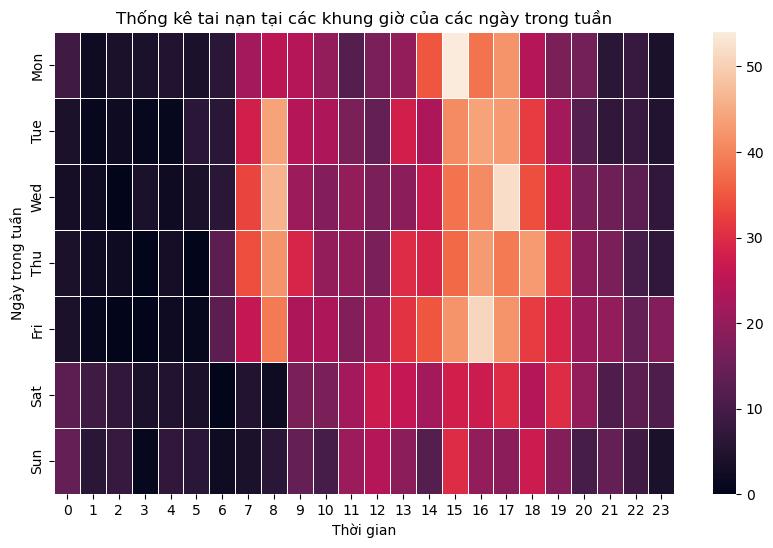

In [50]:
# visualize
import matplotlib.pyplot as plt
import seaborn as sns

day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10,6))
ax = sns.heatmap(matrix_, linewidths=.5, yticklabels = day_of_week)
ax.set_xlabel('Thời gian')
ax.set_ylabel('Ngày trong tuần')
ax.set_title('Thống kê tai nạn tại các khung giờ của các ngày trong tuần')

### 4.2. Question #2

YOUR ANSWER HERE

- Question: Giải thích ý nghĩa từng cột và đưa ra những biểu đồ có thể vẽ để biểu thị những mối liên hệ của các trường dữ liệu
- Meaning: Dự đoán những trường dữ liệu có thể liên quan với nhau bằng biểu đồ

# Ý nghĩa của từng cột dữ liệu
- **Grid Ref: Easting**    (số nguyên): Tọa độ đông
- **Grid Ref: Northing**  (số nguyên): Tọa độ Bắc
- **Number of Vehicles**   (số nguyên): Số lượng phương tiện trong vụ tai nạn
- **1st Road Class**       (chuỗi): Loại đường chính
- **1st Road Class & No**  (chuỗi): Loại đường và số đuòng
- **Road Surface**         (chuỗi): Tình trạng bề mặt đường
- **Lighting Conditions**  (chuỗi): Điều kiện chiếu sáng
- **Weather Conditions**   (chuỗi): Điều kiện thời tiết
- **Local Authority**      (chuỗi)
- **Type of Vehicle**      (chuỗi)
- **Casualty Class**       (chuỗi): Loại nạn nhân(Người lái xe, người đi cùng, người đi bộ)
- **Casualty Severity**    (chuỗi): Mức độ nghiêm trọng( thương vong, nghiêm trọng, nhẹ)
- **Sex of Casualty**      (chuỗi): Giới tính nạn nhân
- **Age of Casualty**      (số nguyên): tuổi nhạn nhân
- **Reference Number**     (chuỗi): mã số tai nạn
- **Full time**            (kiểu datetime): thời gian tai nạn

**Biểu đồ thể hiện số lượng tại nạn ở mỗi loại đường từ 2018-2019**

{'Motorway': 213, 'A(M)': 74, 'A': 896, 'B': 122, 'C': 6, 'Unclassified': 1687}


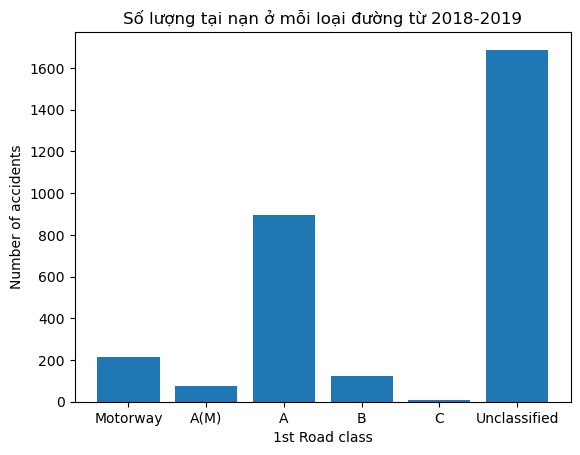

In [51]:
# Lấy cột số lượng 1st Road Class
road_class = data_18_19['1st Road Class'][:]
replace_road_class = {
    '1': 'Motorway',
    '2': 'A(M)',
    '3': 'A',
    '4': 'B',
    '5': 'C',
    '6': 'Unclassified'
}

road_class = [replace_road_class[value] if value in replace_road_class.keys() else value for value in road_class]
num_road_class ={
    'Motorway': 0,
    'A(M)': 0,
    'A': 0,
    'B': 0,
    'C': 0,
    'Unclassified': 0
}
for value in road_class:
    num_road_class[value] += 1
    
print(num_road_class)   

import matplotlib.pyplot as plt
plt.bar(num_road_class.keys(), num_road_class.values())
plt.title('Số lượng tại nạn ở mỗi loại đường từ 2018-2019')
plt.xlabel('1st Road class')
plt.ylabel('Number of accidents')
plt.show()





- Dựa vào biểu dồ cho thấy số lượng tai nạn ở đường chính A chiếm tỷ lệ cao nhất tiếp theo đó là motorway, B, A(M) lần lượt theo thứ tự và đường C có ít tai nạn nhât
- Tuy nhiên vẫn chưa chắc chắn được dữ liệu chính xác do rất nhiều tai nạn không có thông tin về loại đường được biểu thị ở cột unclassified với số lượng cao nhất.

**Biểu đồ so sánh số lượng lượng phương tiện bị tại nạn theo từng mức độ nghiệm trọng từ 2018-2019**

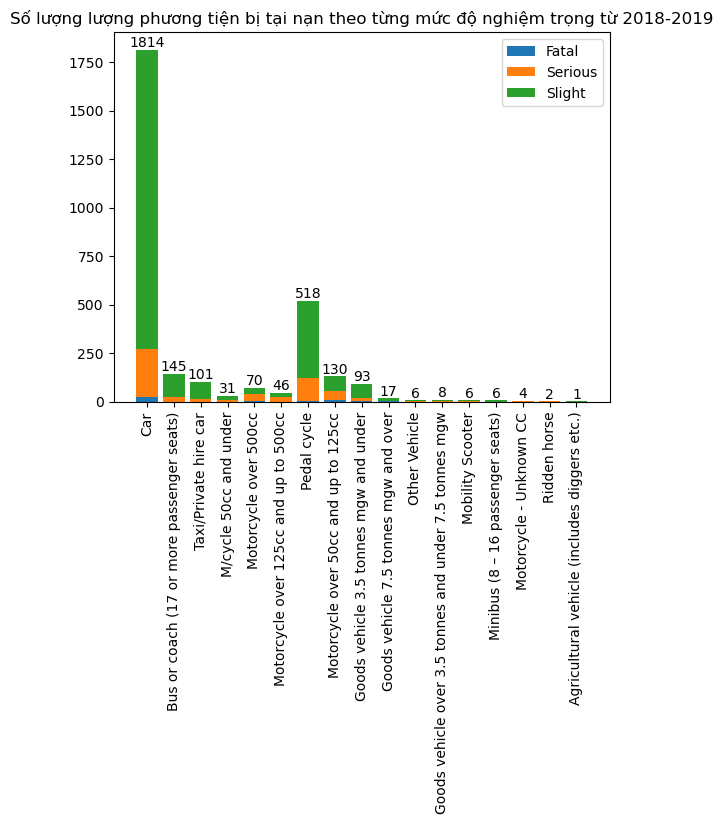

In [52]:
# Lấy type of vehicle
type_of_vehicle = data_18_19['Type of Vehicle'][:]
# Đổi tên các giá trị trong cột
type_of_vehicle_replace = {
    '1'  : 'Pedal cycle',
    '2'  : 'M/cycle 50cc and under',
    '3'  : 'Motorcycle over 50cc and up to 125cc',
    '4'  : 'Motorcycle over 125cc and up to 500cc',
    '5'  : 'Motorcycle over 500cc',
    '8'  : 'Taxi/Private hire car',
    '9'  : 'Car',
    '10' : 'Minibus (8 – 16 passenger seats)',
    '11' : 'Bus or coach (17 or more passenger seats)',
    '14' : 'Other motor vehicle',
    '15' : 'Other non-motor vehicle',
    '16' : 'Ridden horse',
    '17' : 'Agricultural vehicle (includes diggers etc.)',
    '18' : 'Tram / Light rail',
    '19' : 'Goods vehicle 3.5 tonnes mgw and under',
    '20' : 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
    '21' : 'Goods vehicle 7.5 tonnes mgw and over',
    '22' : 'Mobility Scooter',
    '90' : 'Other Vehicle',
    '97' : 'Motorcycle - Unknown CC'
}
type_of_vehicle = [type_of_vehicle_replace[value] if value in type_of_vehicle_replace.keys() else value for value in type_of_vehicle]
# print(type_of_vehicle[:10])
# Lấy cột mức độ nghiêm trọng của vụ tai nạn
casualty_severity = data_18_19['Casualty Severity'][:]
casualty_severity_replace = {
    '1' : 'Fatal',
    '2' : 'Serious',
    '3' : 'Slight'
}
casualty_severity = [casualty_severity_replace[value] if value in casualty_severity_replace.keys() else value for value in casualty_severity]
# print(casualty_severity[:10])

# Đếm số lượng cặp giá trị (loại phương tiện, mức độ nghiêm trọng)
num_vehicle_severity = {}
for i in range(len(type_of_vehicle)):
    if type_of_vehicle[i] not in num_vehicle_severity:
        num_vehicle_severity[type_of_vehicle[i]] = {}
    num_vehicle_severity[type_of_vehicle[i]][casualty_severity[i]] = num_vehicle_severity[type_of_vehicle[i]].get(casualty_severity[i], 0) + 1



# Tạo list các loại phương tiện và mức độ nghiêm trọng
vehicles = list(num_vehicle_severity.keys())
severities = ['Fatal', 'Serious','Slight']

# Tạo dữ liệu cho biểu đồ
bottom = [0] * len(vehicles)
for severity in severities:
    counts = [num_vehicle_severity[vehicle].get(severity, 0) for vehicle in vehicles]
    plt.bar(vehicles, counts, bottom=bottom, label=f'{severity}')
    bottom = [b + c for b, c in zip(bottom, counts)]

# Thêm tổng số lượng tai nạn lên đầu mỗi cột
for i, vehicle in enumerate(vehicles):
    total_accidents = sum(num_vehicle_severity[vehicle].values())
    plt.text(i, total_accidents, str(total_accidents), ha='center', va='bottom')


# Thêm chú thích và hiển thị biểu đồ
plt.xticks(rotation='vertical')
plt.title('Số lượng lượng phương tiện bị tại nạn theo từng mức độ nghiệm trọng từ 2018-2019')
plt.legend()
plt.show()




- Dựa vào biểu dồ rõ ràng thấy rằng số lượng tai nạn ở loại xe car và pedal cycle chiếm tỷ lệ cao nhất với tổng số lượng vượt trội lần lượt là 1814 và 518 tai nạn.
- Những loại xe còn lại có ít tai nạn hơn và nằm dưới 150 tai nạn trong 2 năm 2018-2019.